In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_rows', 100)
PATH = '../data/'

In [2]:
train_df = pd.read_csv(PATH + 'train.csv')
print(train_df.shape)
train_df.head()

(4046, 14)


,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,121-152,region_H
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,153-176,region_I
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,64-76,region_E
3,3,10,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399,177-192,region_C
4,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,97-120,unknown


In [3]:
test_df = pd.read_csv(PATH + 'test.csv')
print(test_df.shape)
test_df.head()

(4046, 13)


,index,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
0,4046,43,192465,0.559812,0.565035,0.522237,-12.217087,0.620510,0.389727,0.214989,0.161924,77-96,region_I
1,4047,40,226536,0.134002,0.542547,0.493128,-2.612846,0.853089,0.163106,0.184183,0.155460,121-152,unknown
2,4048,58,215385,0.140537,0.643086,0.533189,-3.439684,0.834416,0.429304,0.167352,0.179191,121-152,region_K
3,4049,49,254494,0.266406,0.456733,0.410583,-10.830424,0.534261,0.151830,0.174403,0.186061,77-96,region_D
4,4050,50,230934,0.351907,0.526235,0.645625,-9.099337,0.612474,0.319161,0.157594,0.184142,97-120,region_E


In [4]:
np.setdiff1d(train_df.region.unique(), test_df.region.unique()), np.setdiff1d(test_df.region.unique(), train_df.region.unique())

(array(['region_M'], dtype=object), array([], dtype=object))

In [5]:
train_df[train_df.region == 'region_M']

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
855,855,7,36,227826,0.417617,0.456388,0.392994,-6.578298,0.521115,0.210141,0.190945,0.205948,77-96,region_M
1062,1062,7,30,217492,0.332800,0.242828,0.347448,-13.546106,0.421461,0.292140,0.091386,0.159274,121-152,region_M
3699,3699,7,34,154026,0.305865,0.432701,0.329097,-8.581473,0.513972,0.275956,0.117052,0.198250,77-96,region_M


In [6]:
train_df = train_df.drop(train_df[train_df.region == 'region_M'].index, axis=0)
train_df = train_df.reset_index(drop=True)
train_df.shape

(4043, 14)

<AxesSubplot:xlabel='region'>

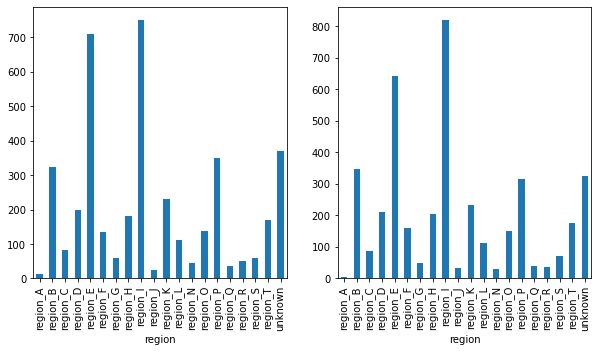

In [7]:
plt.figure(figsize=(5 * 2, 5))
plt.subplot(1, 2, 1)
train_df.groupby('region').count()['index'].plot.bar()
plt.subplot(1, 2, 2)
test_df.groupby('region').count()['index'].plot.bar()

In [13]:
group = train_df.groupby(['region', 'genre']).count()['index'].reset_index()
group['label'] = np.arange(group.shape[0])
group = group.drop(columns=['index'], axis=1)
print(group.shape)
group.head()

(121, 3)


,region,genre,label
0,region_A,8,0
1,region_A,10,1
2,region_B,0,2
3,region_B,1,3
4,region_B,2,4


In [15]:
train_df = train_df.merge(group, how='left', on=['region', 'genre'])
train_df.head()

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region,label
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,121-152,region_H,46
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,153-176,region_I,54
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,64-76,region_E,24
3,3,10,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399,177-192,region_C,14
4,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,97-120,unknown,113
